In [1]:
cd ..

/Users/fengcong/Quantum/Graph-CVAE


In [2]:
from dataset import QuantumCircuitDataset
import tempfile

dataset = QuantumCircuitDataset(
    tempfile.mkdtemp('quantum'),
    base_num_samples=5,
    num_qubits=10,
    max_depth=100,
    regenerate=True,
    topo_types=['grid', 'random']
)

Transpile参数组合数：19

=== 开始生成数据集 ===
基础样本数：5 | 拓扑类型：['grid', 'random'] | 总样本数：190
比特数：10 | 门类型：['h', 'x', 'z', 't', 's', 'cx', 'swap'] | 最大电路深度：100


原始电路生成进度:   0%|          | 0/5 [00:00<?, ?it/s]/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
原始电路生成进度: 100%|██████████| 5/5 [03:12<00:00, 38.40s/it]


=== 数据集生成完成 ===
成功生成样本数：190/190


In [4]:
len(dataset)

190

In [5]:
dataset[3]

{'g': Data(x=[48, 17], edge_index=[2, 70]),
 't': Data(x=[10, 10], edge_index=[2, 26]),
 'g_star': Data(x=[47, 17], edge_index=[2, 68]),
 'quantum_origin': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]])},
 'quantum_optimized': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          [0.

## Visualize g, g* (optimzed g).

In [6]:
sample = dataset[1]
g, g_star, t = sample['g'], sample['g_star'], sample['t']

In [7]:
g_star.edge_index

tensor([[ 1,  2,  3,  2,  1,  6,  5,  7,  5,  7,  9,  8, 10,  8, 12, 13, 14,  3,
         15, 10, 14, 15, 17,  4, 18, 19, 18, 20, 21, 24, 23, 25, 11, 26, 22, 27,
         21, 28, 20, 29,  0, 30, 31, 30, 32, 29, 32, 33, 34, 16, 34, 35, 36, 31,
         36, 37, 37, 38, 35, 39, 17, 40, 38, 33, 39, 42, 40, 43, 44, 45, 43, 46,
         47, 44, 42, 47, 28, 49, 27, 50, 13, 26, 41, 52, 41, 53, 48, 54],
        [ 2,  3,  4,  5,  5,  7,  7,  8,  8,  9, 10, 10, 11, 13, 13, 14, 15, 15,
         16, 17, 17, 18, 18, 19, 19, 20, 21, 21, 22, 25, 26, 26, 27, 27, 28, 28,
         29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37,
         38, 38, 39, 39, 40, 40, 41, 41, 42, 42, 43, 43, 44, 44, 45, 46, 47, 47,
         48, 48, 49, 49, 50, 50, 51, 51, 52, 52, 53, 53, 54, 54, 55, 55]])

In [18]:
len(g.x)

48

In [19]:
# from converter import data_to_quantum_circuit

g_qc = data_to_quantum_circuit(g, dataset.num_qubits, dataset.basic_gates)
g_star_qc = data_to_quantum_circuit(g_star, dataset.num_qubits, dataset.basic_gates)

In [20]:
g_qc.draw()

┌───┐                                                »
q_0: ─X─────────────■──┤ Z ├──────────────────────────────■─────────■───────»
      │             │  └───┘                              │         │       »
q_1: ─┼────────X────┼────■─────────■────────X─────────────┼────■────┼────■──»
      │ ┌───┐  │    │  ┌─┴─┐       │        │             │    │  ┌─┴─┐  │  »
q_2: ─┼─┤ T ├──┼────┼──┤ X ├───────┼────────┼───■─────────┼────┼──┤ X ├──┼──»
      │ ├───┤  │    │  └───┘┌───┐  │  ┌───┐ │   │  ┌───┐  │    │  └───┘┌─┴─┐»
q_3: ─┼─┤ X ├──┼────┼────■──┤ T ├──┼──┤ H ├─┼───┼──┤ H ├──┼────┼───────┤ X ├»
      │ └───┘  │  ┌─┴─┐  │  └───┘┌─┴─┐└───┘ │ ┌─┴─┐└───┘┌─┴─┐  │       └───┘»
q_4: ─┼────────┼──┤ X ├──┼───────┤ X ├──────┼─┤ X ├─────┤ X ├──┼────────────»
      │        │  └───┘┌─┴─┐     └───┘      │ └───┘     └───┘┌─┴─┐          »
q_5: ─┼───■────┼───────┤ X ├──X────X────────┼────────────────┤ X ├──────────»
      │   │    │  ┌───┐└───┘  │    │        │                └───┘          »
q_6: ─┼───┼────X──┤ T ├──X────┼────┼────────┼───────────────────────────────»
      │ ┌─┴─┐     └───┘  │    │    │        │ ┌───┐                         »
q_7: ─┼─┤ X ├────────────┼────┼────┼────────X─┤ S ├─────────────────────────»
      │ └───┘┌───┐       │    │    │          └───┘                         »
q_8: ─┼──────┤ X ├───────X────X────X────────────────────────────────────────»
      │ ┌───┐├───┤                                                          »
q_9: ─X─┤ X ├┤ Z ├──────────────────────────────────────────────────────────»
        └───┘└───┘                                                          »
«                                                                        
«q_0: ──■─────────■───────■────■──────X───X──────────────■───────────────
«       │         │       │    │      │   │              │               
«q_1: ──┼─────────┼───X───┼────┼──────┼───┼──────────────┼───────■───────
«       │  ┌───┐  │   │   │    │      │   │              │       │       
«q_2: ──┼──┤ Z ├──┼───┼───┼────┼──────┼───┼──────────────┼───────┼───────
«       │  ├───┤  │   │   │    │      │   │              │       │       
«q_3: ──┼──┤ H ├──┼───X───┼────┼──────┼───X──────────────┼───────┼────■──
«       │  └───┘  │     ┌─┴─┐  │      │                ┌─┴─┐     │    │  
«q_4: ──┼─────────┼─────┤ X ├──┼───X──┼─────────────■──┤ X ├─────┼────┼──
«       │         │     └───┘  │   │  │             │  └───┘     │  ┌─┴─┐
«q_5: ──┼─────────┼────────────┼───┼──┼─────────────┼────────X───┼──┤ X ├
«       │       ┌─┴─┐          │   │  │      ┌───┐  │  ┌───┐ │ ┌─┴─┐└───┘
«q_6: ──┼───────┤ X ├──────────┼───X──┼───■──┤ X ├──┼──┤ H ├─┼─┤ X ├─────
«       │       └───┘          │      │   │  └───┘┌─┴─┐└───┘ │ └───┘     
«q_7: ──┼──────────────────────┼──────┼───┼────■──┤ X ├──X───┼───────────
«       │                      │      │   │  ┌─┴─┐└───┘  │   │           
«q_8: ──┼──────────────────────┼──────X───┼──┤ X ├──■────X───┼───────────
«     ┌─┴─┐                  ┌─┴─┐      ┌─┴─┐└───┘┌─┴─┐      │           
«q_9: ┤ X ├──────────────────┤ X ├──────┤ X ├─────┤ X ├──────X───────────
«     └───┘                  └───┘      └───┘     └───┘

In [21]:
g_star_qc.draw()

┌───┐┌───┐                                                                »
q_0: ┤ Z ├┤ X ├──X─────────────────X───────────────────────────────────────────»
     ├───┤└───┘  │                 │                                           »
q_1: ┤ T ├───────X─────────────────┼─────────X─────────────────────────────────»
     ├───┤                         │         │                                 »
q_2: ┤ T ├─────────────────────X───X─────────┼─────────────────────────────────»
     ├───┤               ┌───┐ │      ┌───┐  │                                 »
q_3: ┤ X ├────────────■──┤ T ├─┼───■──┤ H ├──X───────────────────────────────X─»
     └───┘            │  └───┘ │   │  └───┘                                  │ »
q_4: ──X─────────X────┼────X───X───┼────■────X───────────────────────────────┼─»
       │         │  ┌─┴─┐  │     ┌─┴─┐  │    │                         ┌───┐ │ »
q_5: ──X────X────X──┤ X ├──X─────┤ X ├──┼────X─────────■────────────■──┤ Z ├─X─»
            │       └───┘        └───┘┌─┴─┐     ┌───┐  │            │  └───┘   »
q_6: ───────┼─────────────────────────┤ X ├──■──┤ S ├──┼────────────┼──────────»
            │                         └───┘┌─┴─┐└───┘┌─┴─┐        ┌─┴─┐        »
q_7: ───────X────■─────────────────────────┤ X ├─────┤ X ├──■───X─┤ X ├────────»
     ┌───┐       │                         └───┘     └───┘  │   │ └───┘        »
q_8: ┤ X ├───────┼──────────────────────────────────────────┼───┼──────────────»
     └───┘     ┌─┴─┐┌───┐                                 ┌─┴─┐ │              »
q_9: ──────────┤ X ├┤ Z ├─────────────────────────────────┤ X ├─X──────────────»
               └───┘└───┘                                 └───┘                »
«                                                                            »
«q_0: ───────────────────────────────────────────────────────────────────────»
«                                                                            »
«q_1: ───────────────────────────────────────────────────────────────────────»
«                                                                            »
«q_2: ───────────────────────────────────────────────────────X───────────────»
«                                                            │               »
«q_3: ───────────────────────────────────────────────────────┼───────────────»
«                                                            │               »
«q_4: ──────────────────────────────────────────────────■────X────X──────────»
«                                                       │         │          »
«q_5: ──■────────────────X───────────────────────X──────┼─────────┼──────────»
«       │                │                       │    ┌─┴─┐       │          »
«q_6: ──┼────────────────┼───────X───────────────┼──X─┤ X ├───────X──────────»
«     ┌─┴─┐              │       │               │  │ └───┘                  »
«q_7: ┤ X ├─X────────■───X───■───X───■───────■───X──┼───X──────────────────X─»
«     └───┘ │        │       │       │       │      │   │                  │ »
«q_8: ──────┼───■────┼───────┼───────┼───X───┼───X──X───┼────■─────────────┼─»
«           │ ┌─┴─┐┌─┴─┐   ┌─┴─┐   ┌─┴─┐ │ ┌─┴─┐ │      │  ┌─┴─┐┌───┐┌───┐ │ »
«q_9: ──────X─┤ X ├┤ X ├───┤ X ├───┤ X ├─X─┤ X ├─X──────X──┤ X ├┤ X ├┤ H ├─X─»
«             └───┘└───┘   └───┘   └───┘   └───┘           └───┘└───┘└───┘   »
«                    
«q_0: ───────────────
«                    
«q_1: ────────────■──
«                 │  
«q_2: ────────────┼──
«               ┌─┴─┐
«q_3: ───────X──┤ X ├
«            │  └───┘
«q_4: ───────┼───────
«            │       
«q_5: ──X────X───────
«       │            
«q_6: ──┼────■───────
«       │    │       
«q_7: ──X────┼───────
«          ┌─┴─┐     
«q_8: ──■──┤ X ├─────
«     ┌─┴─┐└───┘     
«q_9: ┤ X ├──────────
«     └───┘

In [22]:
sample['optimization_metrics']

{'depth_ratio': 2.2, 'total_gate_ratio': 1.1667, 'two_qubit_ratio': 1.303}

In [23]:
sample['meta']

{'base_idx': 0,
 'topo_type': 2,
 'layout_method': 0,
 'routing_method': 0,
 'optimization_level': 2}

In [24]:
origin_um = sample['quantum_origin']['unitary'].numpy()
optimized_um = sample['quantum_optimized']['unitary'].numpy()

In [25]:
optimized_um.shape, origin_um.shape

((1024, 1024), (1024, 1024))

## Visualize topo.

In [26]:
topo_data = sample['t']
topo_data

Data(x=[10, 10], edge_index=[2, 26])

In [27]:
from torch_geometric.utils import to_networkx

topo_g = to_networkx(topo_data, to_undirected=True)
topo_g.number_of_edges(), topo_g.number_of_nodes()

(13, 10)

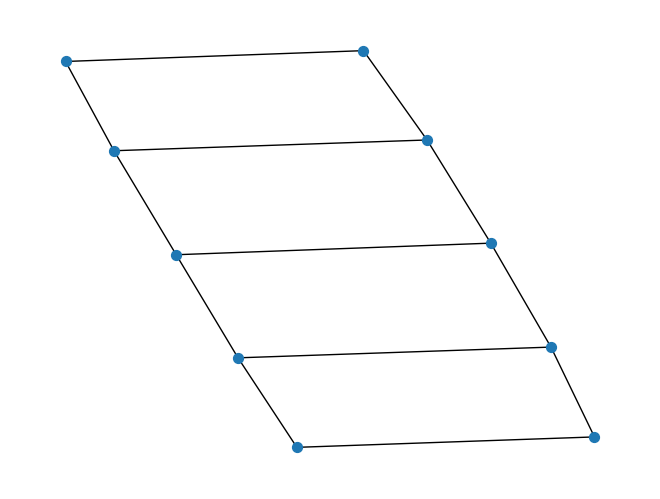

In [28]:
import networkx as nx

nx.draw(topo_g, node_size=50) # 2x5 grid

## Statistic of the dataset.

In [29]:

from dataset_stats import extract_scalars_to_dataframe

In [30]:
df = extract_scalars_to_dataframe(dataset)

In [31]:
df

,sample_idx,base_idx,topo_type,layout_method,routing_method,optimization_level,origin_num_qubits,origin_total_gates,origin_depth,origin_two_qubit_gates,opt_num_qubits,opt_total_gates,opt_depth,opt_two_qubit_gates,depth_ratio,total_gate_ratio,two_qubit_ratio
0,0,0,grid,trivial,basic,1,10,48,15,33,10,100,70,87,4.6667,2.0833,2.6364
1,1,0,grid,trivial,basic,2,10,48,15,33,10,56,33,43,2.2000,1.1667,1.3030
2,2,0,grid,trivial,lookahead,1,10,48,15,33,10,74,42,61,2.8000,1.5417,1.8485
3,3,0,grid,trivial,lookahead,2,10,48,15,33,10,47,24,34,1.6000,0.9792,1.0303
4,4,0,grid,trivial,sabre,1,10,48,15,33,10,71,35,58,2.3333,1.4792,1.7576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,185,4,random,sabre,lookahead,1,10,93,27,57,10,141,66,77,2.4444,1.5161,1.3509
186,186,4,random,sabre,lookahead,2,10,93,27,57,10,93,43,34,1.5926,1.0000,0.5965
187,187,4,random,sabre,sabre,0,10,93,27,57,10,135,64,71,2.3704,1.4516,1.2456
188,188,4,random,sabre,sabre,1,10,93,27,57,10,134,61,70,2.2593,1.4409,1.2281


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='optimization_level', ylabel='depth_ratio'>

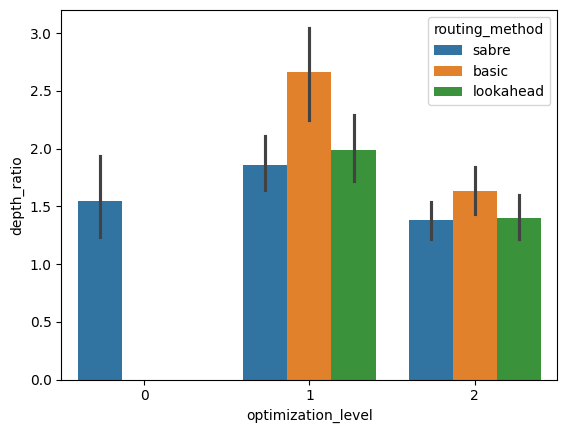

In [33]:
sns.barplot(df, x='optimization_level', y='depth_ratio', hue='routing_method')

<Axes: xlabel='optimization_level', ylabel='depth_ratio'>

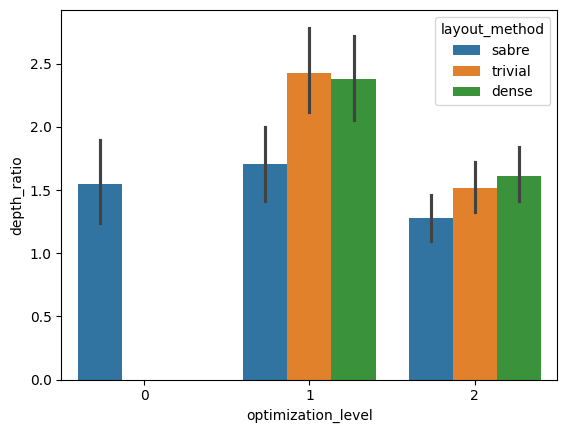

In [34]:
sns.barplot(df, x='optimization_level', y='depth_ratio', hue='layout_method')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

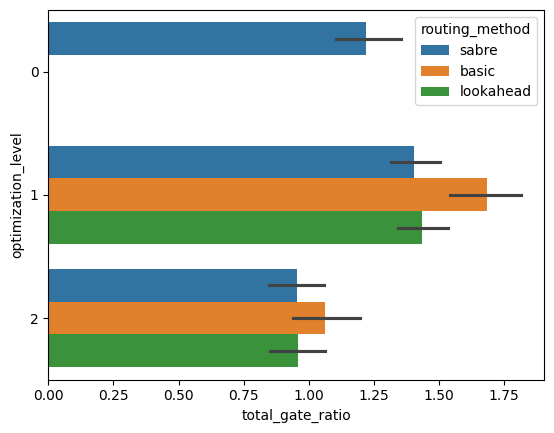

In [35]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='routing_method', orient='h')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

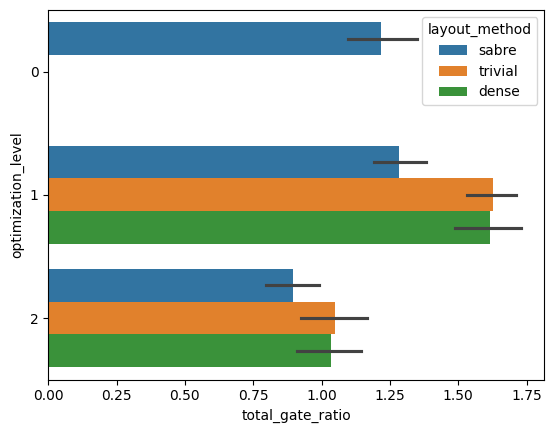

In [36]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='layout_method', orient='h')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

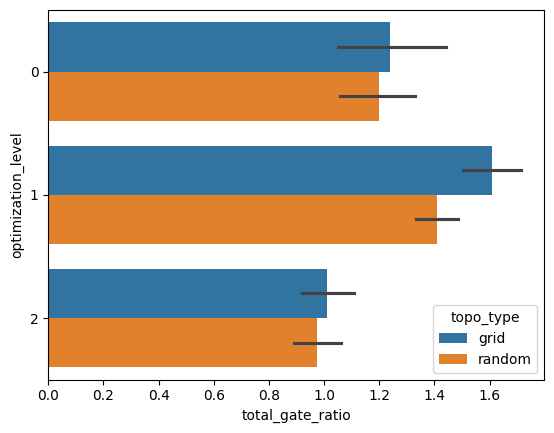

In [37]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='topo_type', orient='h')


<Axes: xlabel='depth_ratio', ylabel='optimization_level'>

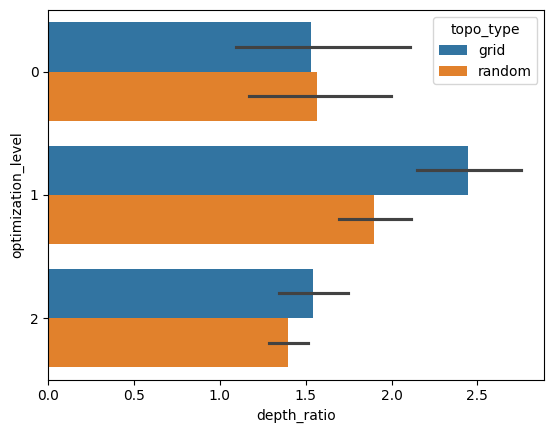

In [38]:
sns.barplot(df, x='depth_ratio', y='optimization_level', hue='topo_type', orient='h')
